In [3]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/NOVA_AI/Iris.csv")
df.head(20)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [5]:
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['Species']

In [6]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating the Decision Tree classifier
clf = DecisionTreeClassifier()

# Training the classifier on the training data
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [7]:
# Making predictions on the test data
predictions = clf.predict(X_test)

# Evaluating the accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [8]:
df['Prediction'] = clf.predict(df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])

# Displaying the DataFrame with the new 'Prediction' column
print(df.head(20))

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0    1            5.1           3.5            1.4           0.2  Iris-setosa   
1    2            4.9           3.0            1.4           0.2  Iris-setosa   
2    3            4.7           3.2            1.3           0.2  Iris-setosa   
3    4            4.6           3.1            1.5           0.2  Iris-setosa   
4    5            5.0           3.6            1.4           0.2  Iris-setosa   
5    6            5.4           3.9            1.7           0.4  Iris-setosa   
6    7            4.6           3.4            1.4           0.3  Iris-setosa   
7    8            5.0           3.4            1.5           0.2  Iris-setosa   
8    9            4.4           2.9            1.4           0.2  Iris-setosa   
9   10            4.9           3.1            1.5           0.1  Iris-setosa   
10  11            5.4           3.7            1.5           0.2  Iris-setosa   
11  12            4.8       

In [9]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Prediction
0,1,5.1,3.5,1.4,0.2,Iris-setosa,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa,Iris-setosa


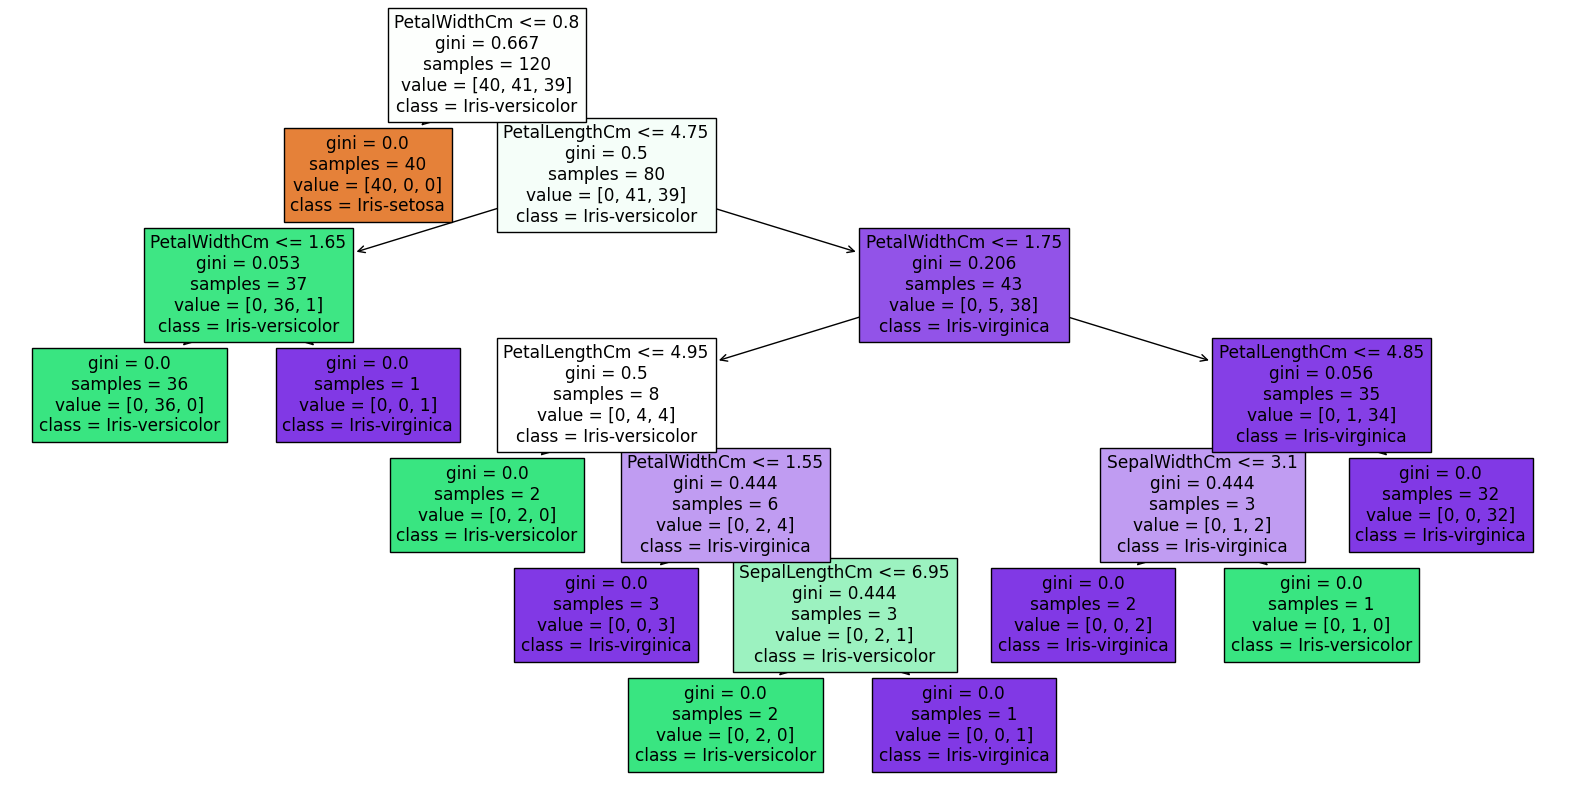

In [10]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plotting the decision tree
plt.figure(figsize=(20,10))  # Adjust the figure size as needed
plot_tree(clf, feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], class_names=df['Species'].unique(), filled=True)
plt.show()

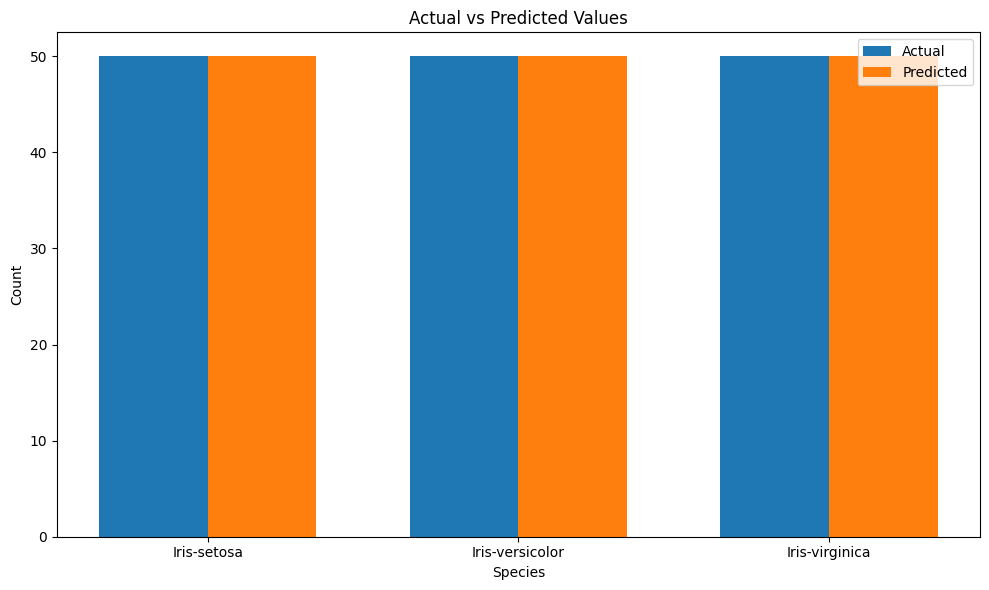

In [12]:
import numpy as np
# Counting the actual and predicted values
actual_counts = df['Species'].value_counts()
predicted_counts = df['Prediction'].value_counts()

# Getting unique categories
categories = df['Species'].unique()

# Sorting categories for consistency in plotting
categories.sort()

# Setting up the figure
plt.figure(figsize=(10, 6))

# Creating bar plots for actual and predicted values
bar_width = 0.35
index = np.arange(len(categories))
plt.bar(index, actual_counts, bar_width, label='Actual')
plt.bar(index + bar_width, predicted_counts, bar_width, label='Predicted')

# Adding labels and title
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Actual vs Predicted Values')
plt.xticks(index + bar_width / 2, categories)
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()